# Saddle-node Bifurcation


# Example 6.33, autocatalytic feedback Model by Griffith 1971

$$
 \dot{x} = -ax +y \\
 \dot{y} = \frac{x^2}{(1+x^2)} - by
$$

Trivial Fixed point

$$E_0 = (0,0)$$
 We have other two fixed points
 $$E_{1,2} = \left(\frac{1\pm \sqrt{\left(1-4a^2b^2\right)}}{2ab}, \frac{1\pm \sqrt{\left(1-4a^2b^2\right)}}{2b}\right)$$

Below code will shows how Saddle-node bifurcation looks like in above system  as value fo the parameter 'a varries'.


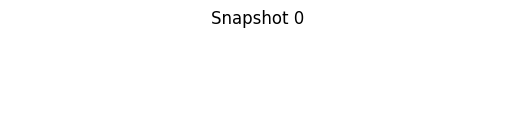

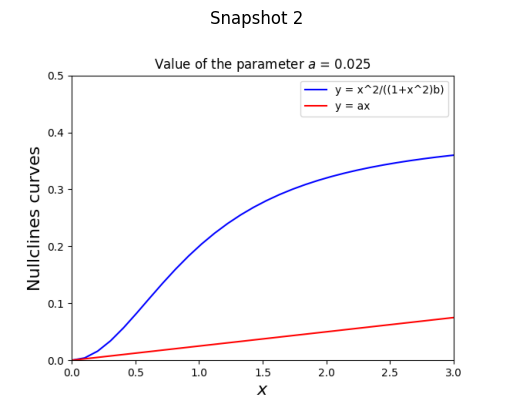

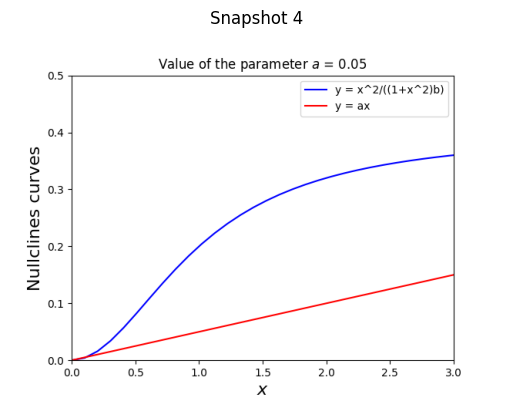

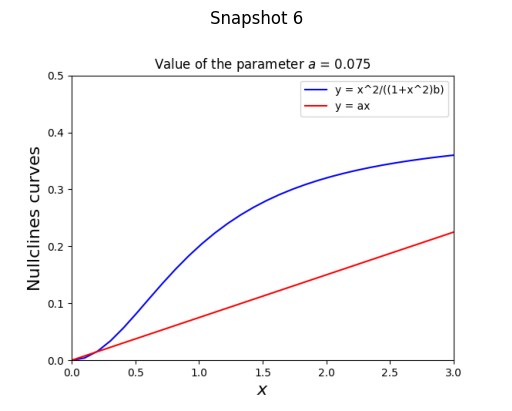

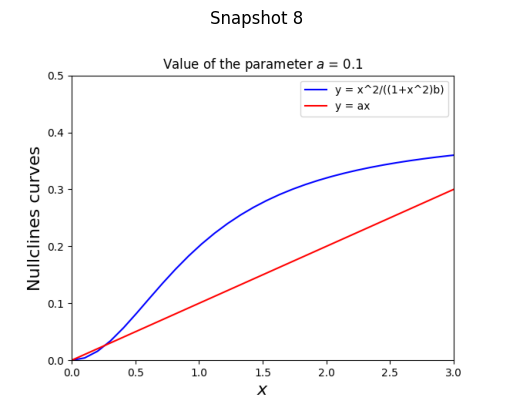

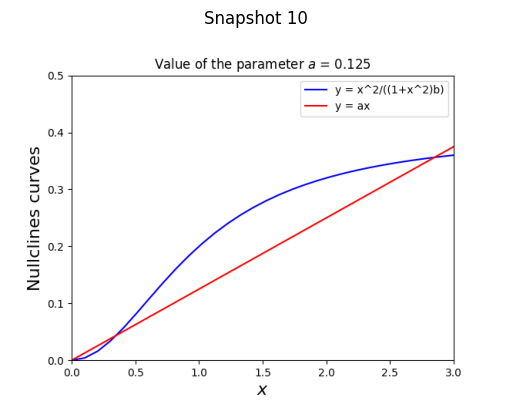

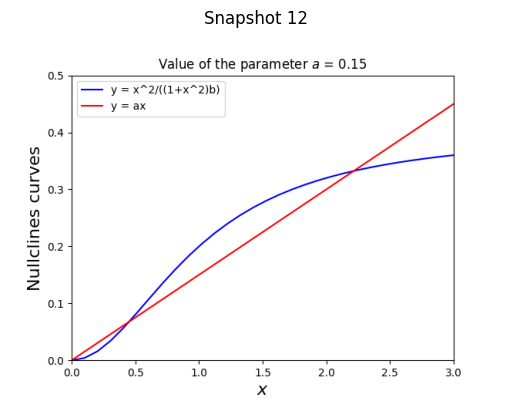

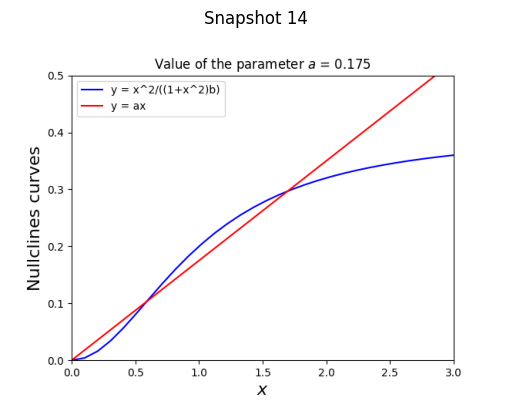

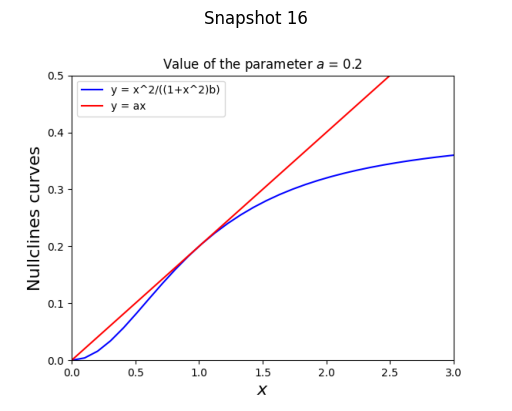

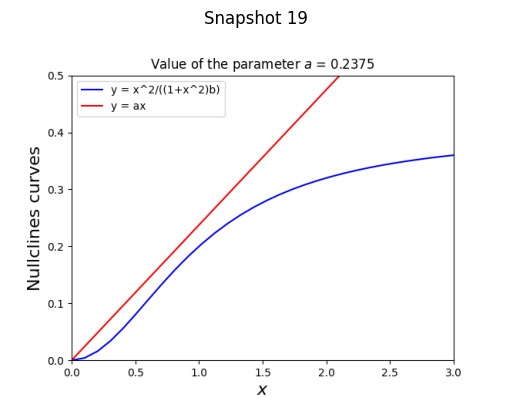

In [15]:

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define range for x
x = np.linspace(0, 5, 50)  # You can choose the grid coaster or finner

# Create figure for plotting
fig, ax = plt.subplots()
# Parameters
b = 2.5  # Set the value of b (I have fixed the value for b>0 but you can change it as you like)


# Set the number of frames for the animation
num_frames = 20

# Initialize an empty list to store snapshots
snapshots = []

# Calculate functions for different 'a' values and create snapshots
for i in range(num_frames):
    # Current value of 'a' for this frame
    a = i / num_frames * 0.25  # Vary 'a' from 0 to 0.6

    # Calculate functions y =ax and y = x^2/((1+x^2)b) for current value of the parameter 'a'
    y1 = a * x
    y2 = x**2 / ((1 + x**2) * b)

    # Plot nullcline y = y = x^2/((1+x^2)b)
    ax.plot(x, y2, 'b', label='y = x^2/((1+x^2)b)')

    # Plot y = ax for current 'a'
    y1 = a * x
    ax.plot(x, y1, 'r', label='y = ax')

    # Update title with current 'a' value
    ax.set_title(f'Value of the parameter $a$ = {a}')
    ax.set_xlabel('$x$', fontsize=16)  # Corrected line to set x-axis label
    ax.set_ylabel('Nullclines curves', fontsize=16)
    ax.legend(loc='best')

    # Save snapshot of the current frame
    plt.savefig(f'snapshot_{i}.png')  # Save the snapshot as PNG file
    snapshots.append(Image.open(f'snapshot_{i}.png'))  # Append snapshot to the list

#     # Clear the plot for the next frame
    ax.clear()
    ax.set_ylim(0, 0.5)  # Ensure y-axis limits remain constant
    ax.set_xlim(0, 3);    # Ensure x-axis limits remain constant
# # Assuming 'snapshots' is a list/array containing the snapshots
# Save the snapshots as an animated GIF
# snapshots[0].save('changing_a_movie_with_y_ax_and_g_fixed_xy.gif', save_all=True, append_images=snapshots[1:], optimize=False, duration=100, loop=0)


# Display 5 sample snapshots
sample_indices = np.linspace(0, num_frames - 1, 10, dtype=int)
for index in sample_indices:
    plt.imshow(snapshots[index])
    plt.title(f'Snapshot {index}')
    plt.axis('off')
    plt.show()

<h1>Note that if you want to save the simulation, you can run the following code. When executed, it will prompt you to mount your Google Drive and grant access. Upon allowing access, the video will be saved in the same directory as your current notebook location in Google Drive. However, this process may not be preferred by some of you.<h1>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


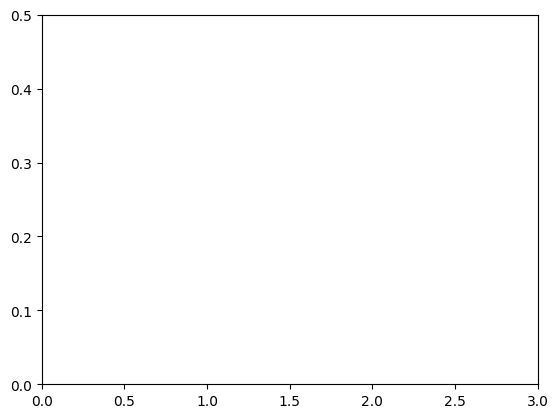

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define range for x
x = np.linspace(0, 5, 100)

# Create figure for plotting
fig, ax = plt.subplots()
# Parameters
b = 2.5  # Set the value of b (you can change it as you like)

# Set the number of frames for the animation
num_frames = 20

# Initialize an empty list to store snapshots
snapshots = []

# Calculate functions for different 'a' values and create snapshots
for i in range(num_frames):
    # Current value of 'a' for this frame
    a = i / num_frames * 0.25  # Vary 'a' from 0 to 0.6

    # Calculate functions y = ax and y = x^2/((1+x^2)b) for current value of the parameter 'a'
    y1 = a * x
    y2 = x**2 / ((1 + x**2) * b)

    # Plot nullcline y = y = x^2/((1+x^2)b)
    ax.plot(x, y2, 'b', label='y = x^2/((1+x^2)b)')

    # Plot y = ax for current 'a'
    y1 = a * x
    ax.plot(x, y1, 'r', label='y = ax')

    # Update title with current 'a' value
    ax.set_title(f'Value of the parameter $a$ = {a}')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('Nullclines curves', fontsize=16)
    ax.legend(loc='best')

    # Save snapshot of the current frame
    filename = f'/content/drive/My Drive/snapshot_{i:03d}.png'  # Save in Google Drive
    plt.savefig(filename)  # Save the snapshot as PNG file
    snapshots.append(filename)  # Append snapshot filename to the list

    # Clear the plot for the next frame
    ax.clear()
    ax.set_ylim(0, 0.5)  # Ensure y-axis limits remain constant
    ax.set_xlim(0, 3)    # Ensure x-axis limits remain constant

# Use OpenCV (cv2) to create a video from the saved frames
frame = cv2.imread(snapshots[0])
height, width, layers = frame.shape
video_name = '/content/drive/My Drive/Teaching/saddle-node-bifurcation.mp4'  # Output video name

video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'mp4v'), 5, (width, height))

for snap in snapshots:
    video.write(cv2.imread(snap))

cv2.destroyAllWindows()
video.release()
